In [40]:
import numpy as np
import scipy.stats as stats
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from IPython.core.pylabtools import figsize
import math

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.style.use('ggplot')

10 	 10


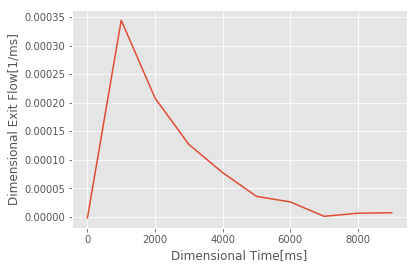

In [3]:
data_file = 'TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat'
data_points = 10
epsilon = 1.0
length = 35.0

def p_n(n):
    return (n+0.5)*np.pi

def r_plus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)+np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def r_minus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)-np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def A_n(p_n, r_plus, r_minus, k_a):
    return (r_plus + (p_n**2) + k_a)/(r_plus - r_minus)

def Flow(diffusivity, k_a, k_d, epsilon, length, time):
    dimensionless_time = time * diffusivity/(epsilon*length**2)
    r_flow = np.zeros(len(time))
    for n in range(100):
        pn = p_n(n); r_p = r_plus(p_n=pn, k_a=k_a, k_d=k_d); r_m = r_minus(p_n=pn, k_a=k_a, k_d=k_d)
        A = A_n(p_n=pn, r_plus=r_p, r_minus=r_m, k_a=k_a)
        r_flow += np.power(-1.0,n)*(2.0*n+1.0)*( A*np.exp(r_m*dimensionless_time)+(1.0-A)*np.exp(r_p*dimensionless_time) )
    r_flow *= np.pi
    r_flow *= diffusivity/(epsilon*np.power(length, 2))

    return r_flow

dimensional_time = np.zeros(data_points)
dimensional_exit_flow = np.zeros(data_points)
i = 0
j = 0
for line in open(data_file, "r"):
    if i%(10000/data_points)==0:
        data = line.split("\t")
        dimensional_time[j] = data[0]
        dimensional_exit_flow[j] = data[1]
        j += 1
    else:
        pass
    i += 1

print(len(dimensional_time), "\t", len(dimensional_exit_flow))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dimensional_time, dimensional_exit_flow)

ax.set_xlabel('Dimensional Time[ms]')
ax.set_ylabel('Dimensional Exit Flow[1/ms]')

plt.show()

In [4]:
def file_output_one(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 3<=l<=model.shape[0]+2:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+5)<=l<=(2*model.shape[0]+4):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+7):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

In [5]:
def file_output_two(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 4<=l<=model.shape[0]+3:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+6)<=l<=(2*model.shape[0]+5):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+8):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

## 交換ありのPath1とPath2のBayes Factor比較

In [56]:
read_file_pass = '\\Users\\anbaigashi\\Desktop\\ABC\\2019\\March\\'

time = 102400
#time_n = 204800
Temp = np.array([1, 2, 5, 10, 20], dtype=float)
beta = 1/Temp
print(beta)
print(beta[-1])
print(beta[::-1])
model = 0.1*np.arange(0, 11, dtype=float)
# model = np.array([0, 1])
# print(model)

[ 1.    0.5   0.2   0.1   0.05]
0.05
[ 0.05  0.1   0.2   0.5   1.  ]


In [10]:
de0_one_T1 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T1 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T1 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T1 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T1 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T1 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T1 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T1 = ['zero', 'one', 'two', 'three', 'four']
update_one_T1 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T1 = ['zero', 'one', 'two', 'three', 'four']

de0_one_T2 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T2 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T2 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T2 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T2 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T2 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T2 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T2 = ['zero', 'one', 'two', 'three', 'four']
update_one_T2 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T2 = ['zero', 'one', 'two', 'three', 'four']


de0_one_T5 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T5 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T5 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T5 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T5 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T5 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T5 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T5 = ['zero', 'one', 'two', 'three', 'four']
update_one_T5 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T5 = ['zero', 'one', 'two', 'three', 'four']

de0_one_T10 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T10 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T10 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T10 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T10 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T10 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T10 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T10 = ['zero', 'one', 'two', 'three', 'four']
update_one_T10 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T10 = ['zero', 'one', 'two', 'three', 'four']

de0_one_T20 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T20 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T20 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T20 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T20 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T20 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T20 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T20 = ['zero', 'one', 'two', 'three', 'four']
update_one_T20 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T20 = ['zero', 'one', 'two', 'three', 'four']

In [11]:
%%time 

read_file_pass = '\\Users\\anbaigashi\\Desktop\\ABC\\2019\\March\\'
time = 102400
model = 0.1*np.arange(0, 11, dtype=float)

for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=1.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T1[i], de1_one_T1[i], ka_one_T1[i], kd_one_T1[i], sigma_one_T1[i], energy_one_T1[i], dlogp_one_T1[i],\
    pick_one_T1[i], update_one_T1[i], exchange_one_T1[i] = file_output_one(r_file, time, model)

    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=2.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T2[i], de1_one_T2[i], ka_one_T2[i], kd_one_T2[i], sigma_one_T2[i], energy_one_T2[i], dlogp_one_T2[i],\
    pick_one_T2[i], update_one_T2[i], exchange_one_T2[i] = file_output_one(r_file, time, model)
    
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=5.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T5[i], de1_one_T5[i], ka_one_T5[i], kd_one_T5[i], sigma_one_T5[i], energy_one_T5[i], dlogp_one_T5[i],\
    pick_one_T5[i], update_one_T5[i], exchange_one_T5[i] = file_output_one(r_file, time, model)
       
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=10.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T10[i], de1_one_T10[i], ka_one_T10[i], kd_one_T10[i], sigma_one_T10[i], energy_one_T10[i], dlogp_one_T10[i],\
    pick_one_T10[i], update_one_T10[i], exchange_one_T10[i] = file_output_one(r_file, time, model)
    
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=20.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T20[i], de1_one_T20[i], ka_one_T20[i], kd_one_T20[i], sigma_one_T20[i], energy_one_T20[i], dlogp_one_T20[i],\
    pick_one_T20[i], update_one_T20[i], exchange_one_T20[i] = file_output_one(r_file, time, model)

Wall time: 4min 50s


In [12]:
de0_two = ['zero', 'one', 'two', 'three', 'four']
de1_two = ['zero', 'one', 'two', 'three', 'four']
ka_two = ['zero', 'one', 'two', 'three', 'four']
kd_two = ['zero', 'one', 'two', 'three', 'four']
sigma_two = ['zero', 'one', 'two', 'three', 'four']
energy_two = ['zero', 'one', 'two', 'three', 'four']
dlogp_two = ['zero', 'one', 'two', 'three', 'four']
pick_two = ['zero', 'one', 'two', 'three', 'four']
update_two = ['zero', 'one', 'two', 'three', 'four']
exchange_two = ['zero', 'one', 'two', 'three', 'four']

In [15]:
%%time

for i in range(5):
    r_file = read_file_pass + 'EMbeta_TAP-sigma_datapoints=10_T=102400mcs_Temp=1-20_replica=5_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_two[i], de1_two[i], ka_two[i], kd_two[i], sigma_two[i], energy_two[i], dlogp_two[i],\
    pick_two[i], update_two[i], exchange_two[i] = file_output_two(r_file, time, np.hstack((Temp, Temp)))

Wall time: 47.4 s


(5, 11)


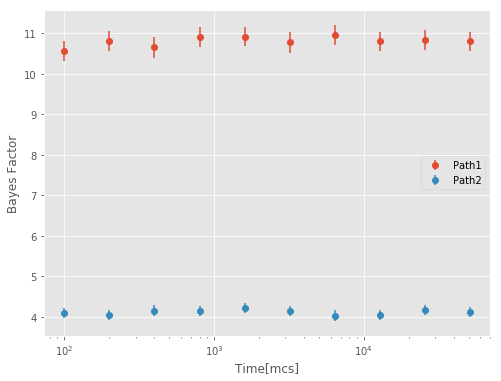

In [59]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\PathHikaku\\'


start = 51200
end = 2*start 

dE_one = np.zeros([5, 11])
for i in range(5):
    for j in range(11):
        dE_one[i, j] = dlogp_one_T1[i][j, start:end].mean()
print(dE_one.shape)
        
E_M0 = np.zeros([5, 5])
E_M1 = np.zeros([5, 5])
dE_two = np.zeros([5, 2])

for i in range(5):
    for j in range(5):
        E_M0[i, j] = energy_two[i][j, start:end].mean()
        E_M1[i, j] = energy_two[i][9-j, start:end].mean()
    dE_two[i, 0] = dlogp_two[i][4, start:end].mean()
    dE_two[i, 1] = dlogp_two[i][5, start:end].mean()   

t_0 = 100
start = t_0
end = 2*start
    
while start<102400:
            
    N = 200
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE_one[x[j], j]
        S[i] = integrate.simps(y[i], model)/1.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Path1')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
     

    y_M0 = np.zeros([N, 5])
    y_M1 = np.zeros([N, 5])
    y_TN = np.zeros([N, 2])
    S_M0 = np.zeros(N)
    S_M1 = np.zeros(N)
    S_TN = np.zeros(N)
    for i in range(N):
        x_M0 = np.random.randint(0, 5, 5)
        x_M1 = np.random.randint(0, 5, 5)
        x_TN = np.random.randint(0, 5, 2)
        for j in range(5):
            y_M0[i, j] = E_M0[x_M0[j], j]
            y_M1[i, j] = E_M1[x_M1[j], j]
        S_M0[i] = integrate.simps(y_M0[i], beta)#*(-1/(Temp**2)), Temp)
        S_M1[i] = integrate.simps(y_M1[i], beta)#*(-1/(Temp**2)), Temp)
    #    S_M0[i] = integrate.simps(y_M0[i], beta)
    #    S_M1[i] = integrate.simps(y_M1[i], beta)
        for j in range(2):
            y_TN[i, j] = dE_two[x_TN[j], j]
        S_TN[i] = integrate.simps(y_TN[i], np.array([0, 1]))
    
    BF_path2 = S_M1-S_M0+beta[-1]*S_TN
    
    bar_BF = BF_path2.mean()
    sig_BF = 0.

    for i in range(N):
        sig_BF += (BF_path2[i]-bar_BF)**2
    sig_BF /= (BF_path2.shape[0]-1)
    sig_BF = np.sqrt(sig_BF)
    sig_BF /= np.sqrt(BF_path2.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[1], label='Path2')
    else:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[1])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend(loc='center right')
#ax.set_ylim(-0.5, .5)
# fn = write_file_pass + 'BayesFactor-Time_Path1-2Hikaku_deltaT=51200-102400.png'
#plt.savefig(fn)
plt.show()

(5, 11)


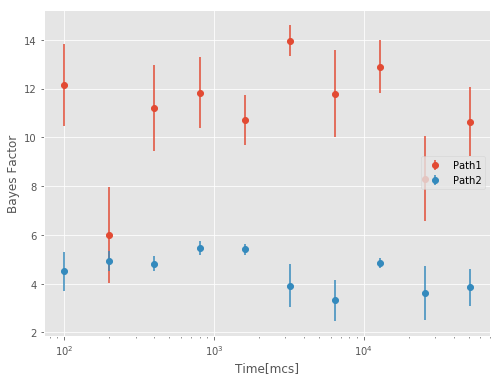

In [60]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\PathHikaku\\'


start = 51200
end = 2*start 

dE_one = np.zeros([5, 11])
for i in range(5):
    for j in range(11):
        dE_one[i, j] = dlogp_one_T1[i][j, start:end].mean()
print(dE_one.shape)
        
E_M0 = np.zeros([5, 5])
E_M1 = np.zeros([5, 5])
dE_two = np.zeros([5, 2])

for i in range(5):
    for j in range(5):
        E_M0[i, j] = energy_two[i][j, start:end].mean()
        E_M1[i, j] = energy_two[i][9-j, start:end].mean()
    dE_two[i, 0] = dlogp_two[i][4, start:end].mean()
    dE_two[i, 1] = dlogp_two[i][5, start:end].mean()   

t_0 = 100
start = t_0
end = 2*start
    
while start<102400:
            
    N = 5
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE_one[x[j], j]
        S[i] = integrate.simps(y[i], model)/1.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Path1')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
     

    y_M0 = np.zeros([N, 5])
    y_M1 = np.zeros([N, 5])
    y_TN = np.zeros([N, 2])
    S_M0 = np.zeros(N)
    S_M1 = np.zeros(N)
    S_TN = np.zeros(N)
    for i in range(N):
        x_M0 = np.random.randint(0, 5, 5)
        x_M1 = np.random.randint(0, 5, 5)
        x_TN = np.random.randint(0, 5, 2)
        for j in range(5):
            y_M0[i, j] = E_M0[x_M0[j], j]
            y_M1[i, j] = E_M1[x_M1[j], j]
        S_M0[i] = integrate.simps(y_M0[i], beta)#*(-1/(Temp**2)), Temp)
        S_M1[i] = integrate.simps(y_M1[i], beta)#*(-1/(Temp**2)), Temp)
    #    S_M0[i] = integrate.simps(y_M0[i], beta)
    #    S_M1[i] = integrate.simps(y_M1[i], beta)
        for j in range(2):
            y_TN[i, j] = dE_two[x_TN[j], j]
        S_TN[i] = integrate.simps(y_TN[i], np.array([0, 1]))
    
    BF_path2 = S_M1-S_M0+beta[-1]*S_TN
    
    bar_BF = BF_path2.mean()
    sig_BF = 0.

    for i in range(N):
        sig_BF += (BF_path2[i]-bar_BF)**2
    sig_BF /= (BF_path2.shape[0]-1)
    sig_BF = np.sqrt(sig_BF)
    sig_BF /= np.sqrt(BF_path2.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[1], label='Path2')
    else:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[1])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend(loc='center right')
#ax.set_ylim(-0.5, .5)
# fn = write_file_pass + 'BayesFactor-Time_Path1-2Hikaku_deltaT=51200-102400.png'
#plt.savefig(fn)
plt.show()

## Bayes Factor が定量的に一致しない理由

## Path1

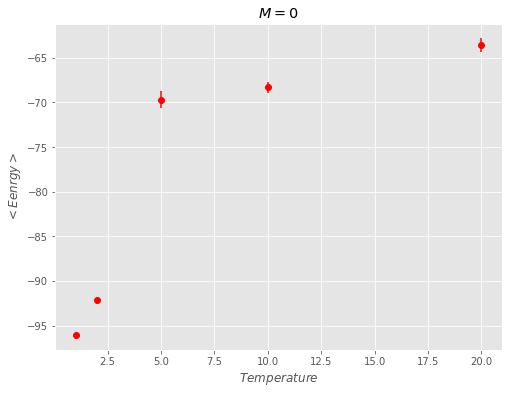

In [37]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

#write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\Path2\\'

start = 51200
end = 2*start
element = 5

energy_m_M0_path1 = np.zeros(element, dtype=float)
energy_s_M0_path1 = np.zeros(element, dtype=float)

bar_A_i = np.zeros(5, dtype=float)
for j in range(5):
    bar_A_i[j] = energy_one_T1[j][0][start:end].mean()
energy_m_M0_path1[0] = bar_A_i.mean()

sig = 0.
for j in range(5):
    sig += (bar_A_i[j]-energy_m_M0_path1[0])**2
sig /= (bar_A_i.shape[0]-1)
sig = np.sqrt(sig)
sig /= np.sqrt(bar_A_i.shape[0])
energy_s_M0_path1[0] = sig

bar_A_i = np.zeros(5, dtype=float)
for j in range(5):
    bar_A_i[j] = energy_one_T2[j][0][start:end].mean()
energy_m_M0_path1[1] = bar_A_i.mean()

sig = 0.
for j in range(5):
    sig += (bar_A_i[j]-energy_m_M0_path1[1])**2
sig /= (bar_A_i.shape[0]-1)
sig = np.sqrt(sig)
sig /= np.sqrt(bar_A_i.shape[0])
energy_s_M0_path1[1] = sig

bar_A_i = np.zeros(5, dtype=float)
for j in range(5):
    bar_A_i[j] = energy_one_T5[j][0][start:end].mean()
energy_m_M0_path1[2] = bar_A_i.mean()

sig = 0.
for j in range(5):
    sig += (bar_A_i[j]-energy_m_M0_path1[2])**2
sig /= (bar_A_i.shape[0]-1)
sig = np.sqrt(sig)
sig /= np.sqrt(bar_A_i.shape[0])
energy_s_M0_path1[2] = sig

bar_A_i = np.zeros(5, dtype=float)
for j in range(5):
    bar_A_i[j] = energy_one_T10[j][0][start:end].mean()
energy_m_M0_path1[3] = bar_A_i.mean()

sig = 0.
for j in range(5):
    sig += (bar_A_i[j]-energy_m_M0_path1[3])**2
sig /= (bar_A_i.shape[0]-1)
sig = np.sqrt(sig)
sig /= np.sqrt(bar_A_i.shape[0])
energy_s_M0_path1[3] = sig

bar_A_i = np.zeros(5, dtype=float)
for j in range(5):
    bar_A_i[j] = energy_one_T20[j][0][start:end].mean()
energy_m_M0_path1[4] = bar_A_i.mean()

sig = 0.
for j in range(5):
    sig += (bar_A_i[j]-energy_m_M0_path1[4])**2
sig /= (bar_A_i.shape[0]-1)
sig = np.sqrt(sig)
sig /= np.sqrt(bar_A_i.shape[0])
energy_s_M0_path1[4] = sig


ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_m_M0_path1, yerr=energy_s_M0_path1, fmt='o', color='red')
ax.set_title('$M=0$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<Eenrgy>$')

#fn = write_file_pass + filename
#     plt.savefig(fn)

plt.show()

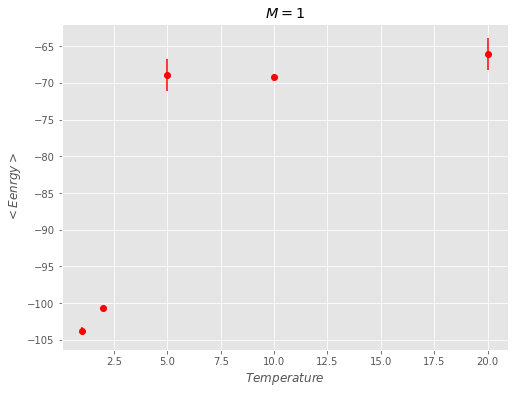

In [38]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

#write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\Path2\\'

start = 51200
end = 2*start
element = 5

energy_m_M1_path1 = np.zeros(element, dtype=float)
energy_s_M1_path1 = np.zeros(element, dtype=float)

bar_A_i = np.zeros(5, dtype=float)
for j in range(5):
    bar_A_i[j] = energy_one_T1[j][10][start:end].mean()
energy_m_M1_path1[0] = bar_A_i.mean()

sig = 0.
for j in range(5):
    sig += (bar_A_i[j]-energy_m_M1_path1[0])**2
sig /= (bar_A_i.shape[0]-1)
sig = np.sqrt(sig)
sig /= np.sqrt(bar_A_i.shape[0])
energy_s_M1_path1[0] = sig

bar_A_i = np.zeros(5, dtype=float)
for j in range(5):
    bar_A_i[j] = energy_one_T2[j][10][start:end].mean()
energy_m_M1_path1[1] = bar_A_i.mean()

sig = 0.
for j in range(5):
    sig += (bar_A_i[j]-energy_m_M1_path1[1])**2
sig /= (bar_A_i.shape[0]-1)
sig = np.sqrt(sig)
sig /= np.sqrt(bar_A_i.shape[0])
energy_s_M1_path1[1] = sig

bar_A_i = np.zeros(5, dtype=float)
for j in range(5):
    bar_A_i[j] = energy_one_T5[j][10][start:end].mean()
energy_m_M1_path1[2] = bar_A_i.mean()

sig = 0.
for j in range(5):
    sig += (bar_A_i[j]-energy_m_M1_path1[2])**2
sig /= (bar_A_i.shape[0]-1)
sig = np.sqrt(sig)
sig /= np.sqrt(bar_A_i.shape[0])
energy_s_M1_path1[2] = sig

bar_A_i = np.zeros(5, dtype=float)
for j in range(5):
    bar_A_i[j] = energy_one_T10[j][10][start:end].mean()
energy_m_M1_path1[3] = bar_A_i.mean()

sig = 0.
for j in range(5):
    sig += (bar_A_i[j]-energy_m_M1_path1[3])**2
sig /= (bar_A_i.shape[0]-1)
sig = np.sqrt(sig)
sig /= np.sqrt(bar_A_i.shape[0])
energy_s_M1_path1[3] = sig

bar_A_i = np.zeros(5, dtype=float)
for j in range(5):
    bar_A_i[j] = energy_one_T20[j][10][start:end].mean()
energy_m_M1_path1[4] = bar_A_i.mean()

sig = 0.
for j in range(5):
    sig += (bar_A_i[j]-energy_m_M1_path1[4])**2
sig /= (bar_A_i.shape[0]-1)
sig = np.sqrt(sig)
sig /= np.sqrt(bar_A_i.shape[0])
energy_s_M1_path1[4] = sig


ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_m_M1_path1, yerr=energy_s_M1_path1, fmt='o', color='red')
ax.set_title('$M=1$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<Eenrgy>$')

#fn = write_file_pass + filename
#     plt.savefig(fn)

plt.show()

In [44]:
def fig_dE(start, dlogp, filename):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    
#    write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\'

    end = 2*start

    dlogp_m = np.zeros(11, dtype=float)
    dlogp_s = np.zeros(11, dtype=float)

    for i in range(11):
        bar_A_i = np.zeros(5, dtype=float)
        for j in range(5):
            bar_A_i[j] = dlogp[j][i][start:end].mean()
        dlogp_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(5):
            sig += (bar_A_i[j]-dlogp_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        dlogp_s[i] = sig


    ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color='red')
    ax.set_xlabel('$M$')
    ax.set_ylabel('$<-dE/dM>$')

#     fn = write_file_pass + filename
#     plt.savefig(fn)

    plt.show()
    
    return dlogp_m, dlogp_s

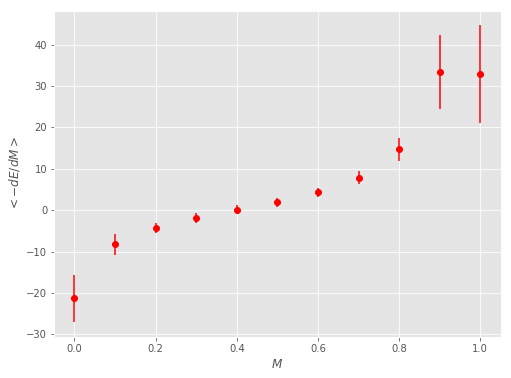

In [46]:
dlogp_m_T20_Path1, dlogp_s_T20_Path1 = fig_dE(51200, dlogp_one_T20, 'dEnergy-M_figure_Temp=20_deltaT=51200-102400.png')

## Path2

In [33]:
def fig_energy_M0(start, energy, filename):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    
#    write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\Path2\\'

    end = 2*start
    element = 5

    energy_m = np.zeros(element, dtype=float)
    energy_s = np.zeros(element, dtype=float)

    for i in range(element):
        bar_A_i = np.zeros(4, dtype=float)
        for j in range(4):##5
            bar_A_i[j] = energy[j][i][start:end].mean()
        energy_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(4):##5
            sig += (bar_A_i[j]-energy_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        energy_s[i] = sig


    ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_m, yerr=energy_s, fmt='o', color='red')
    ax.set_title('$M=0$')
    ax.set_xlabel('$Temperature$')
    ax.set_ylabel('$<Eenrgy>$')

#    fn = write_file_pass + filename
#     plt.savefig(fn)

    plt.show()
    
    return energy_m, energy_s

In [34]:
def fig_energy_M1(start, energy, filename):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    
#    write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\Path2\\'

    end = 2*start
    element = 5

    energy_m = np.zeros(element, dtype=float)
    energy_s = np.zeros(element, dtype=float)

    for i in range(element):
        bar_A_i = np.zeros(4, dtype=float)
        for j in range(4):#5
            bar_A_i[j] = energy[j][9-i][start:end].mean()##ここでiを変える
        energy_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(4):#5
            sig += (bar_A_i[j]-energy_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        energy_s[i] = sig


    ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_m, yerr=energy_s, fmt='o', color='red')
    ax.set_title('$M=1$')
    ax.set_xlabel('$Temperature$')
    ax.set_ylabel('$<Eenrgy>$')

#    fn = write_file_pass + filename
#     plt.savefig(fn)

    plt.show()
    
    return energy_m, energy_s

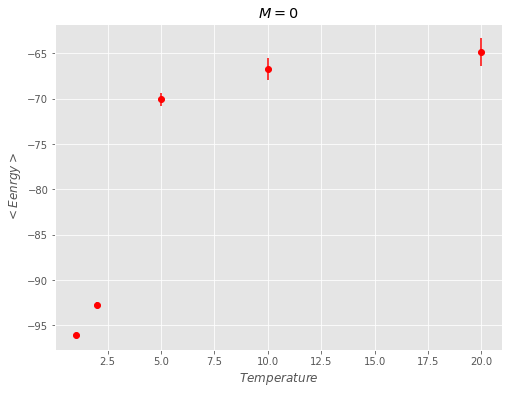

In [35]:
energy_twoM0_m_Path2, energy_twoM0_s_Path2 = fig_energy_M0(51200, energy_two, 'Energy-Temperature_figure_M=0_Temp=1-20_deltaT=51200-102400.png')

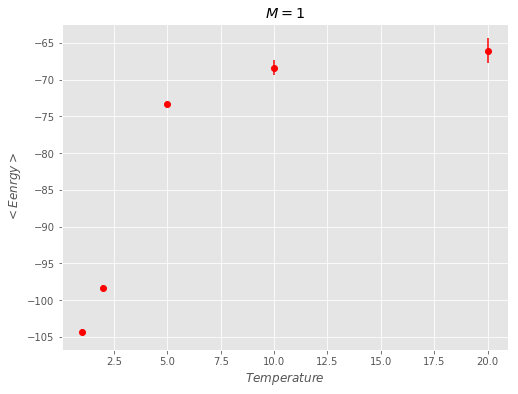

In [36]:
energy_twoM1_m_Path2, energy_twoM1_s_Path2 = fig_energy_M1(51200, energy_two,  'Energy-Temperature_figure_M=1_Temp=1-20_deltaT=51200-102400.png')

In [47]:
def fig_dE(start, dlogp, filename):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    
#    write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\Path2\\'

    end = 2*start

    dlogp_m = np.zeros(2, dtype=float)
    dlogp_s = np.zeros(2, dtype=float)

    for i in range(2):
        bar_A_i = np.zeros(5, dtype=float)
        for j in range(5):
            bar_A_i[j] = dlogp[j][4+i][start:end].mean()##ここ注意(iについて)
        dlogp_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(5):
            sig += (bar_A_i[j]-dlogp_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        dlogp_s[i] = sig


    ax.errorbar(np.array([0, 1]), dlogp_m, yerr=dlogp_s, fmt='o', color='red')
    ax.set_title('$Temperature=20$')
    ax.set_xlabel('$M$')
    ax.set_ylabel('$<-dE/dM>$')

#    fn = write_file_pass + filename
#    plt.savefig(fn)

    plt.show()
    
    return dlogp_m, dlogp_s

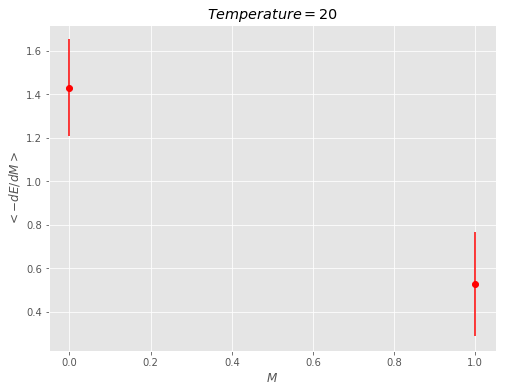

In [48]:
dlogp_two_m_Path2, dlogp_two_s_Path2 = fig_dE(51200, dlogp_two, 'dEnergy-M_figure_Temp=20_Temp=1-20_deltaT=51200-102400.png')

## 比較

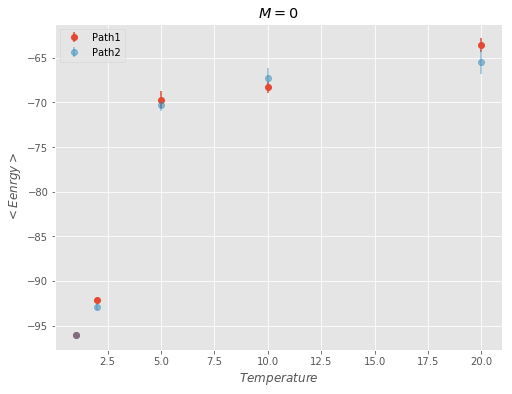

In [98]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_m_M0_path1, yerr=energy_s_M0_path1, fmt='o',
            label='Path1', color=cycle[0])
ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_twoM0_m_Path2, yerr=energy_twoM0_s_Path2, fmt='o',
            label='Path2', color=cycle[1], alpha=0.5)

ax.set_title('$M=0$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<Eenrgy>$')

plt.legend()

fn = write_file_pass + 'Energy-Temperature_Path1-2Hikaku_M=0_Temp=1-20_deltaT=51200-102400.png'
plt.savefig(fn)

plt.show()

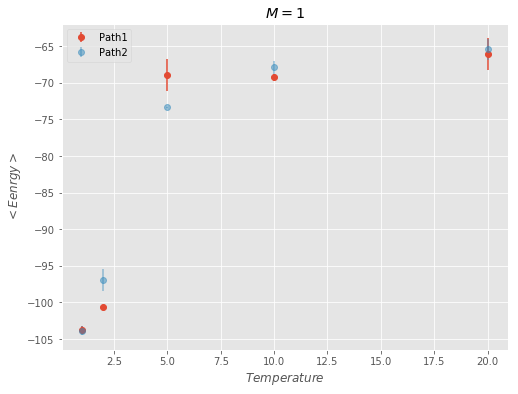

In [99]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_m_M1_path1, yerr=energy_s_M1_path1, fmt='o',
            label='Path1', color=cycle[0])
ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_twoM1_m_Path2, yerr=energy_twoM1_s_Path2, fmt='o',
            label='Path2', color=cycle[1], alpha=0.5)

ax.set_title('$M=1$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<Eenrgy>$')

plt.legend()

fn = write_file_pass + 'Energy-Temperature_Path1-2Hikaku_M=1_Temp=1-20_deltaT=51200-102400.png'
plt.savefig(fn)

plt.show()

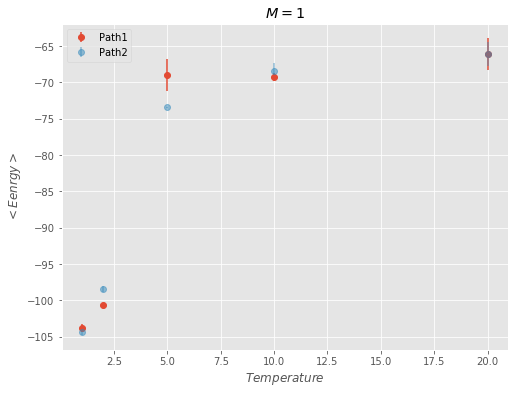

In [42]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_m_M1_path1, yerr=energy_s_M1_path1, fmt='o',
            label='Path1', color=cycle[0])
ax.errorbar(np.array([1, 2, 5, 10, 20]), energy_twoM1_m_Path2, yerr=energy_twoM1_s_Path2, fmt='o',
            label='Path2', color=cycle[1], alpha=0.5)

ax.set_title('$M=1$')
ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<Eenrgy>$')

plt.legend()

# fn = write_file_pass + 'Energy-Temperature_Path1-2Hikaku_M=1_Temp=1-20_deltaT=51200-102400.png'
# plt.savefig(fn)

plt.show()

-99.6417643909
-92.7512297795


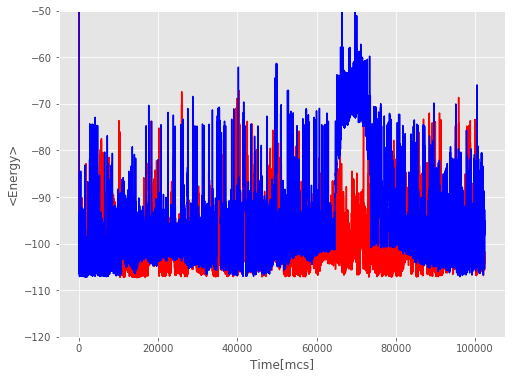

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
jikan = np.arange(0, 102400)

ax.plot(jikan, energy_one_T2[4][10, ], color='red')
ax.plot(jikan, energy_two[4][8, ], color='blue')

print(energy_one_T2[0][10, 100000].mean())
print(energy_two[4][8, 100000].mean())

#ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('<Energy>')
plt.legend()
ax.set_ylim(-120, -50)
#fn = read_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=1.png'
#plt.savefig(fn)
plt.show()

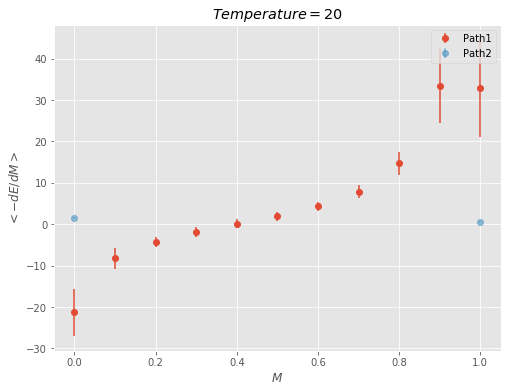

In [100]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.errorbar(0.1*np.arange(0, 11, dtype=float), dlogp_m_T20_Path1, yerr=dlogp_s_T20_Path1, fmt='o',
            label='Path1', color=cycle[0])
ax.errorbar(np.array([0, 1]), dlogp_two_m_Path2, dlogp_two_s_Path2, fmt='o',
            label='Path2', color=cycle[1], alpha=0.5)

ax.set_title('$Temperature=20$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')

fn = write_file_pass + 'dEnergy-M_Path1-2Hikaku_Temp=20_deltaT=51200-102400.png'
plt.savefig(fn)

plt.legend()
plt.show()

In [49]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\PathHikaku\\'


start = 51200
end = 2*start 


E_M0_one = np.zeros([5, 5])
E_M1_one = np.zeros([5, 5])

for i in range(5):
    E_M0_one[i, 0] = energy_one_T1[i][0, start:end].mean()    
    E_M0_one[i, 1] = energy_one_T2[i][0, start:end].mean()
    E_M0_one[i, 2] = energy_one_T5[i][0, start:end].mean()
    E_M0_one[i, 3] = energy_one_T10[i][0, start:end].mean()
    E_M0_one[i, 4] = energy_one_T20[i][0, start:end].mean()
    
    E_M1_one[i, 0] = energy_one_T1[i][10, start:end].mean()    
    E_M1_one[i, 1] = energy_one_T2[i][10, start:end].mean()
    E_M1_one[i, 2] = energy_one_T5[i][10, start:end].mean()
    E_M1_one[i, 3] = energy_one_T10[i][10, start:end].mean()
    E_M1_one[i, 4] = energy_one_T20[i][10, start:end].mean()
    
# print(E_M0_one)
# print(E_M1_one)

dE_one = np.zeros([5, 11])
for i in range(5):
    for j in range(11):
        dE_one[i, j] = dlogp_one_T20[i][j, start:end].mean()
        
#print(dE_one)
        
E_M0_two = np.zeros([5, 5])
E_M1_two = np.zeros([5, 5])
dE_two_two = np.zeros([5, 2])

for i in range(5):
    for j in range(5):
        E_M0_two[i, j] = energy_two[i][j, start:end].mean()
        E_M1_two[i, j] = energy_two[i][9-j, start:end].mean()
    dE_two[i, 0] = dlogp_two[i][4, start:end].mean()
    dE_two[i, 1] = dlogp_two[i][5, start:end].mean()
    
#print(E_M0_two)
#print(E_M1_two)

t_0 = 25
start = t_0
end = 2*start

    
while start<102400:
            
    N = 100

    y_M0 = np.zeros([N, 5])
    y_M1 = np.zeros([N, 5])
    y_TN = np.zeros([N, 11])
    S_M0_one = np.zeros(N)
    S_M1_one = np.zeros(N)
    S_TN_one = np.zeros(N)
    for i in range(N):
        x_M0 = np.random.randint(0, 5, 5)
        x_M1 = np.random.randint(0, 5, 5)
        x_TN = np.random.randint(0, 5, 11)
#        print(x_M0, x_M1)
#        print(x_TN)
        for j in range(5):
            y_M0[i, j] = E_M0_one[x_M0[j], j]
            y_M1[i, j] = E_M1_one[x_M1[j], j]
        S_M0_one[i] = integrate.simps(y_M0[i], beta)#*(-1/(Temp**2)), Temp)
        S_M1_one[i] = integrate.simps(y_M1[i], beta)#*(-1/(Temp**2)), Temp)
        
#         print(y_M0)
#         print(y_M1)

        for j in range(11):
            y_TN[i, j] = dE_one[x_TN[j], j]
        S_TN_one[i] = integrate.simps(y_TN[i], 0.1*np.arange(0, 11, dtype=float))
#        print(y_TN)
    
    BF_path1 = S_M1_one-S_M0_one+beta[-1]*S_TN_one
#     print("Path1", BF_path1)
    
    bar_BF = BF_path1.mean()
    sig_BF = 0.
#    print(bar_BF)

    for i in range(N):
        sig_BF += (BF_path1[i]-bar_BF)**2
    sig_BF /= (BF_path1.shape[0]-1)
    sig_BF = np.sqrt(sig_BF)
    sig_BF /= np.sqrt(BF_path1.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[0], label='Path1')
    else:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[0])
     

    y_M0 = np.zeros([N, 5])
    y_M1 = np.zeros([N, 5])
    y_TN = np.zeros([N, 2])
    S_M0_two = np.zeros(N)
    S_M1_two = np.zeros(N)
    S_TN_two = np.zeros(N)
    for i in range(N):
        x_M0 = np.random.randint(0, 5, 5)
        x_M1 = np.random.randint(0, 5, 5)
        x_TN = np.random.randint(0, 5, 2)
#        print(x_M0, x_M1)
        for j in range(5):
            y_M0[i, j] = E_M0_two[x_M0[j], j]
            y_M1[i, j] = E_M1_two[x_M1[j], j]
        S_M0_two[i] = integrate.simps(y_M0[i], beta)#*(-1/(Temp**2)), Temp)
        S_M1_two[i] = integrate.simps(y_M1[i], beta)#*(-1/(Temp**2)), Temp)
        
#        print(y_M0)
#        print(y_M1)

        for j in range(2):
            y_TN[i, j] = dE_two[x_TN[j], j]
        S_TN_two[i] = integrate.simps(y_TN[i], np.array([0, 1]))
    
    BF_path2 = S_M1_two-S_M0_two+beta[-1]*S_TN_two
#    print("Path2", BF_path2)
    
    bar_BF = BF_path2.mean()
    sig_BF = 0.
#    print(bar_BF)

    for i in range(N):
        sig_BF += (BF_path2[i]-bar_BF)**2
    sig_BF /= (BF_path2.shape[0]-1)
    sig_BF = np.sqrt(sig_BF)
    sig_BF /= np.sqrt(BF_path2.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[1], label='Path2')
    else:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[1])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend(loc='center left')

fn = write_file_pass + 'BayesFactor-Time_Path1-2Hikaku_Path1ondoari_deltaT=51200-102400.png'
#plt.savefig(fn)
plt.show()

NameError: name 'dE_two' is not defined

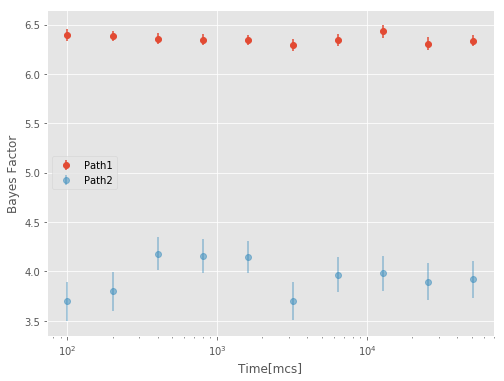

In [144]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
write_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\PathHikaku\\'


start = 51200
end = 2*start 


E_M0_one = np.zeros([5, 5])
E_M1_one = np.zeros([5, 5])

for i in range(5):
    E_M0_one[i, 0] = energy_one_T1[i][0, start:end].mean()    
    E_M0_one[i, 1] = energy_one_T2[i][0, start:end].mean()
    E_M0_one[i, 2] = energy_one_T5[i][0, start:end].mean()
    E_M0_one[i, 3] = energy_one_T10[i][0, start:end].mean()
    E_M0_one[i, 4] = energy_one_T20[i][0, start:end].mean()
    
    E_M1_one[i, 0] = energy_one_T1[i][10, start:end].mean()    
    E_M1_one[i, 1] = energy_one_T2[i][10, start:end].mean()
    E_M1_one[i, 2] = energy_one_T5[i][10, start:end].mean()
    E_M1_one[i, 3] = energy_one_T10[i][10, start:end].mean()
    E_M1_one[i, 4] = energy_one_T20[i][10, start:end].mean()
    
# print(E_M0_one)
#print(E_M1_one)

dE_one = np.zeros([5, 11])
for i in range(5):
    for j in range(11):
        dE_one[i, j] = dlogp_one_T20[i][j, start:end].mean()
        
#print(dE_one)
        
E_M0_two = np.zeros([5, 5])
E_M1_two = np.zeros([5, 5])
dE_two_two = np.zeros([5, 2])

for i in range(5):
    for j in range(5):
        E_M0_two[i, j] = energy_two[i][j, start:end].mean()
        E_M1_two[i, j] = energy_two[i][9-j, start:end].mean()
    dE_two[i, 0] = dlogp_two[i][4, start:end].mean()
    dE_two[i, 1] = dlogp_two[i][5, start:end].mean()
    
#print(E_M1_two)
    
# for i in range(5):
#     E_M1_two[i, 1] = E_M1_one[i, 1]
#     E_M1_two[i, 2] = E_M1_one[i, 2]
#     E_M1_two[i, 3] = E_M1_one[i, 3]
#     E_M1_two[i, 4] = E_M1_one[i, 4]
#     E_M1_two[i, 0] = E_M1_one[i, 0]
#     E_M0_two[i, 1] = E_M0_one[i, 1]
#     E_M0_two[i, 2] = E_M0_one[i, 2]
#     E_M0_two[i, 3] = E_M0_one[i, 3]
#     E_M0_two[i, 4] = E_M0_one[i, 4]
#     E_M0_two[i, 0] = E_M0_one[i, 0]
    
#print(E_M0_two)
#print(E_M1_two)

t_0 = 100
start = t_0
end = 2*start

    
while start<102400:
            
    N = 100
    
    y_M0 = np.zeros([N, 5])
    y_M1 = np.zeros([N, 5])
    y_TN = np.zeros([N, 11])
    S_M0_one = np.zeros(N)
    S_M1_one = np.zeros(N)
    S_TN_one = np.zeros(N)
    for i in range(N):
        x_M0 = np.random.randint(0, 5, 5)
        x_M1 = np.random.randint(0, 5, 5)
        x_TN = np.random.randint(0, 5, 11)
#        print(x_M0, x_M1)
#        print(x_TN)
        for j in range(5):
            y_M0[i, j] = E_M0_one[x_M0[j], j]
            y_M1[i, j] = E_M1_one[x_M1[j], j]
        S_M0_one[i] = integrate.simps(y_M0[i], beta)#*(-1/(Temp**2)), Temp)
        S_M1_one[i] = integrate.simps(y_M1[i], beta)#*(-1/(Temp**2)), Temp)
        
#        print(y_M0)
#         print(y_M1)

#         for j in range(11):
#             y_TN[i, j] = dE_one[x_TN[j], j]
#         S_TN_one[i] = integrate.simps(y_TN[i], 0.1*np.arange(0, 11, dtype=float))
#        print(y_TN)

#    print(S_M1_one, S_M0_one)
    
    BF_path1 = S_M1_one-S_M0_one#+beta[-1]*S_TN_one
#     print("Path1", BF_path1)
    
    bar_BF = BF_path1.mean()
    sig_BF = 0.
#    print(bar_BF)

    for i in range(N):
        sig_BF += (BF_path1[i]-bar_BF)**2
    sig_BF /= (BF_path1.shape[0]-1)
    sig_BF = np.sqrt(sig_BF)
    sig_BF /= np.sqrt(BF_path1.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[0], label='Path1')
    else:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[0])
 

    y_M0 = np.zeros([N, 5])
    y_M1 = np.zeros([N, 5])
    y_TN = np.zeros([N, 2])
    S_M0_two = np.zeros(N)
    S_M1_two = np.zeros(N)
    S_TN_two = np.zeros(N)
    for i in range(N):
        x_M0 = np.random.randint(0, 5, 5)
        x_M1 = np.random.randint(0, 5, 5)
        x_TN = np.random.randint(0, 5, 2)
#        print(x_M0, x_M1)
        for j in range(5):
            y_M0[i, j] = E_M0_two[x_M0[j], j]
            y_M1[i, j] = E_M1_two[x_M1[j], j]
        S_M0_two[i] = integrate.simps(y_M0[i], beta)#*(-1/(Temp**2)), Temp)
        S_M1_two[i] = integrate.simps(y_M1[i], beta)#*(-1/(Temp**2)), Temp)
        
        
#        print(y_M0)
#         print(y_M1)

        for j in range(2):
            y_TN[i, j] = dE_two[x_TN[j], j]
        S_TN_two[i] = integrate.simps(y_TN[i], np.array([0, 1]))
    
#    print('two', S_M1_two, S_M0_two)
    BF_path2 = S_M1_two-S_M0_two#+beta[-1]*S_TN_two
#    print("Path2", BF_path2)
    
    bar_BF = BF_path2.mean()
    sig_BF = 0.
#    print(bar_BF)

    for i in range(N):
        sig_BF += (BF_path2[i]-bar_BF)**2
    sig_BF /= (BF_path2.shape[0]-1)
    sig_BF = np.sqrt(sig_BF)
    sig_BF /= np.sqrt(BF_path2.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[1], label='Path2', alpha=0.5)
    else:
        ax.errorbar(start, bar_BF, sig_BF, fmt='o', color=cycle[1], alpha=0.5)


    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend(loc='center left')

# fn = write_file_pass + 'BayesFactor-Time_Path1-2Hikaku__deltaT=51200-102400.png'
# plt.savefig(fn)
plt.show()